
**Dataset Load**





In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=236074b5ea8f5a71e914fd0a8a5401b3a139052965942678fe82581b1479d80d
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px


import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'], 
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'], 
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'], 
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'], 
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']] 

In [ ]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Dress       5 non-null      bool 
 1   Earrings    5 non-null      bool 
 2   Hat         5 non-null      bool 
 3   Heels       5 non-null      bool 
 4   Necklace    5 non-null      bool 
 5   Pants       5 non-null      bool 
 6   Sandals     5 non-null      bool 
 7   Scarf       5 non-null      bool 
 8   Shirt       5 non-null      bool 
 9   Skirt       5 non-null      bool 
 10  Sneakers    5 non-null      bool 
 11  Sunglasses  5 non-null      bool 
dtypes: bool(12)
memory usage: 188.0 bytes


In [ ]:
df.isna().sum()

Dress         0
Earrings      0
Hat           0
Heels         0
Necklace      0
Pants         0
Sandals       0
Scarf         0
Shirt         0
Skirt         0
Sneakers      0
Sunglasses    0
dtype: int64

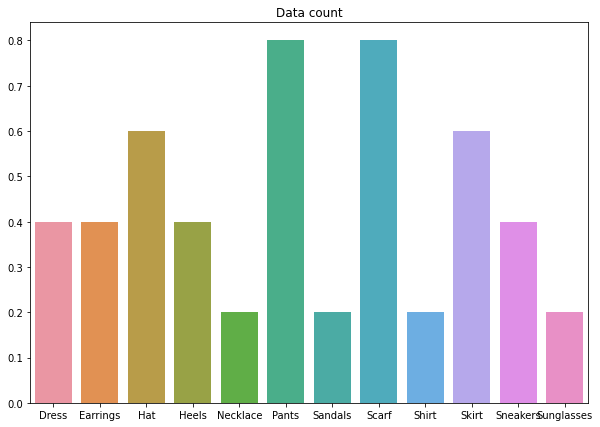

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(ci=None, data=df)
plt.title("Data count")
plt.show()

**Apriori algorithm :**

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
#Support

apriori(df, min_support=0.6)


,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [ ]:
apriori(df,min_support=0.5)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [ ]:
#Support with column names
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Skirt, Pants)"


In [ ]:
#Confidence
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [ ]:
#Lift
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf



**A bigger dataset :**


In [ ]:
data = pd.read_csv("Market_Basket_Optimisation.csv")
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [ ]:
data.isna().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [ ]:
# Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

# Visualising the results
results = list(rules)

In [ ]:
print(results)

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.24